<a href="https://colab.research.google.com/github/kamatamnithin/PUBG-Game-Prediction/blob/main/PUBG_Game_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings("ignore")

# standard libraries
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)

import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv('train_V2.csv')

In [6]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [7]:
df.shape

(56554, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56554 entries, 0 to 56553
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               56554 non-null  object 
 1   groupId          56554 non-null  object 
 2   matchId          56554 non-null  object 
 3   assists          56553 non-null  float64
 4   boosts           56553 non-null  float64
 5   damageDealt      56553 non-null  float64
 6   DBNOs            56553 non-null  float64
 7   headshotKills    56553 non-null  float64
 8   heals            56553 non-null  float64
 9   killPlace        56553 non-null  float64
 10  killPoints       56553 non-null  float64
 11  kills            56553 non-null  float64
 12  killStreaks      56553 non-null  float64
 13  longestKill      56553 non-null  float64
 14  matchDuration    56553 non-null  float64
 15  matchType        56553 non-null  object 
 16  maxPlace         56553 non-null  float64
 17  numGroups   

In [9]:
df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
56553,c343413c020dd5,1d53d39855ab1f,e484f063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop(56553,inplace=True)

In [11]:
df["playersJoined"]=df.groupby('matchId')['matchId'].transform('count')

In [12]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444,3
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400,3
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667,5
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875,2


In [13]:
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']


df['killswithoutMoving'] = ((df['kills']>0) & (df['totalDistance'] ==0))

In [14]:
df[df['killswithoutMoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0.0,0.0,593.0,0.0,0.0,3.0,18.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,3,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2.0,0.0,346.6,0.0,0.0,6.0,33.0,...,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,3,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2.0,0.0,1750.0,0.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,1,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0.0,0.0,157.8,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,1,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0.0,0.0,100.0,0.0,1.0,0.0,37.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,3,0.0,True


In [15]:
df[df['killswithoutMoving']==True].shape

(20, 32)

In [16]:
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

In [17]:
df[df['roadKills']>5].shape

(1, 32)

In [18]:
df.drop(df[df['roadKills']>5].index,inplace=True)

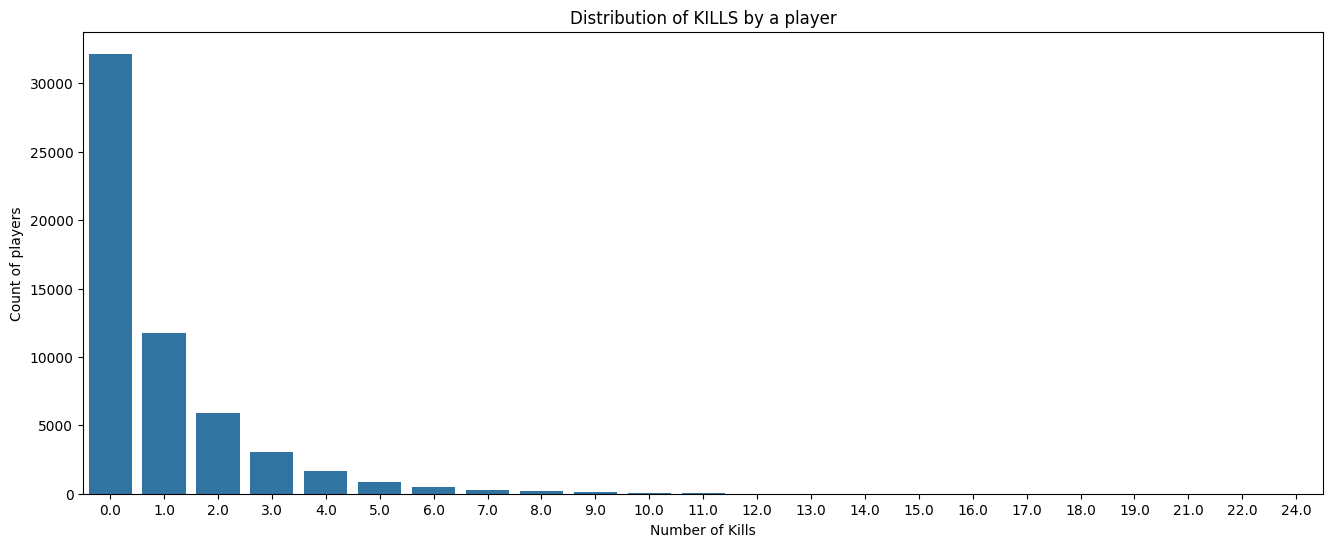

In [19]:

sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

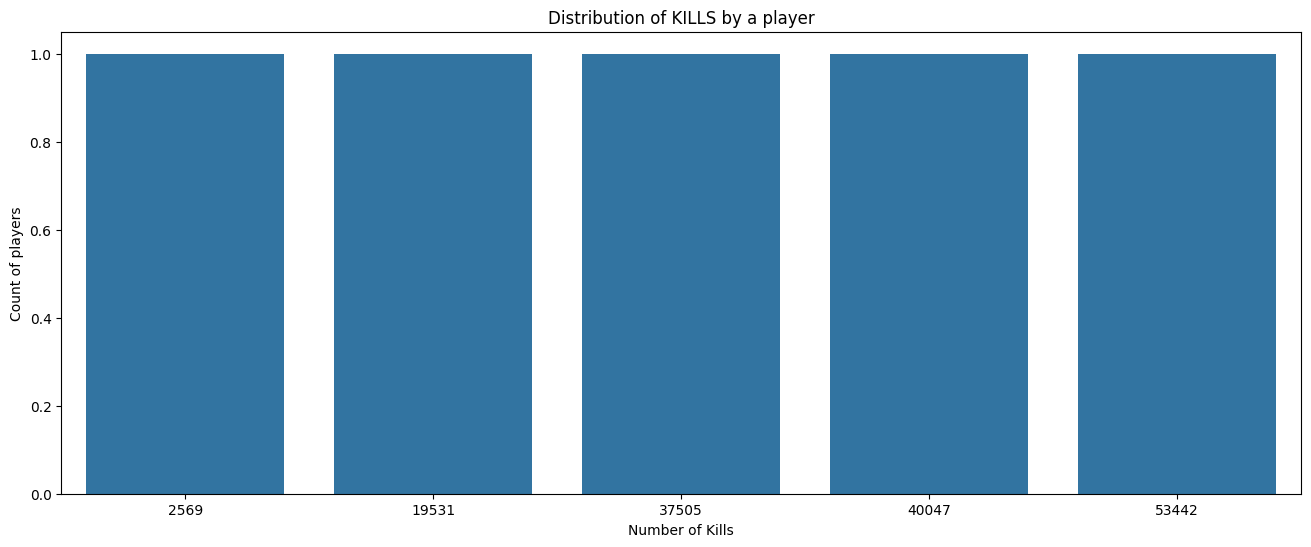

In [20]:
sns.countplot(df[df['kills']>=20]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [21]:
df[df['kills']>20].shape

(5, 32)

In [22]:
df.drop(df[df["kills"]>20].index,inplace=True)

In [23]:
df['headshort_rate']=df['headshotKills']/df['kills']

In [24]:
df['headshort_rate']=df['headshort_rate'].fillna(0)

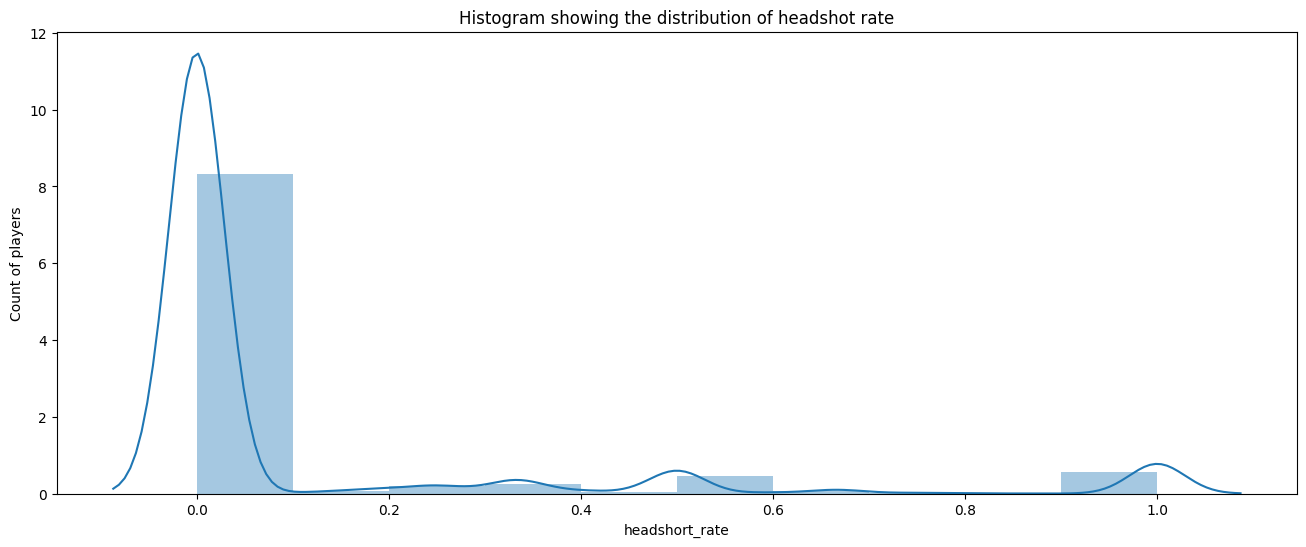

In [25]:
sns.distplot(df['headshort_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [26]:
df.shape

(56527, 33)

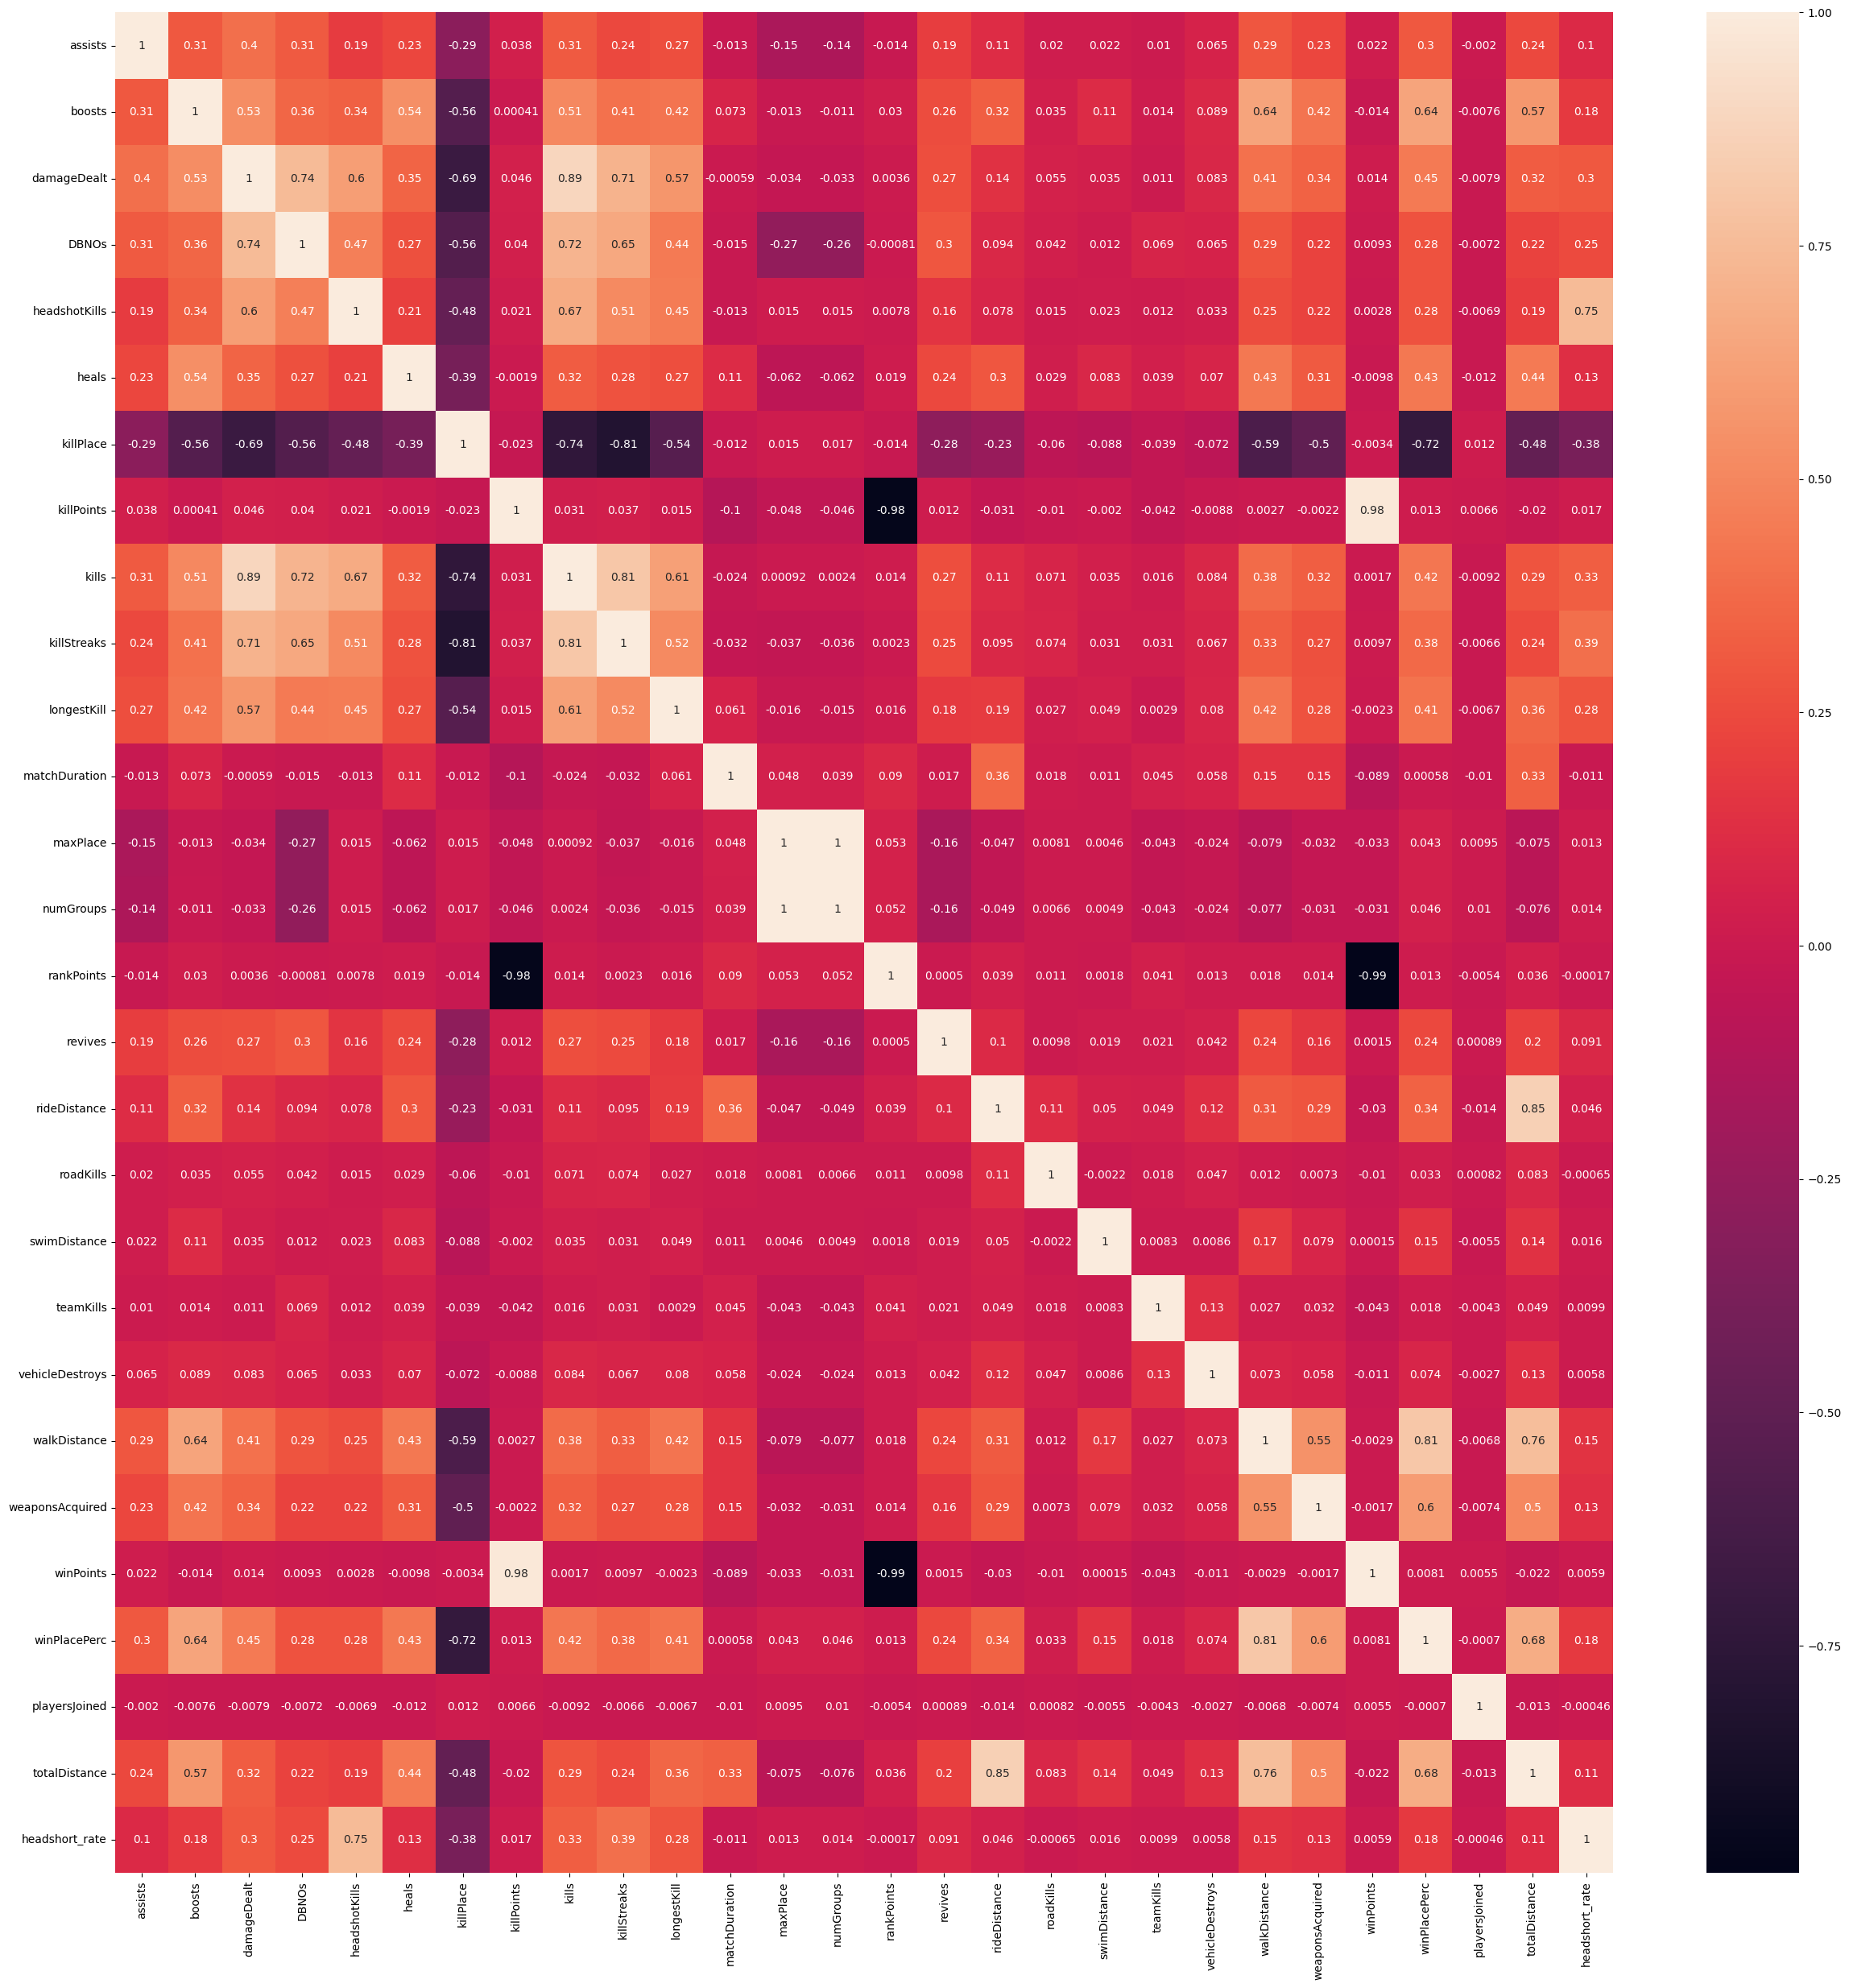

In [27]:
plt.figure(figsize=[30,30])
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

In [28]:

normalising_factor = (100 - df['playersJoined']/100)+1
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [29]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutMoving', 'headshort_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [30]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [31]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutMoving,headshort_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0.0,0.0,60.0,1241.0,0.0,0.00,squad-fpp,26.0,-1.0,0.0,...,244.8000,False,0.0,0.00,0.0000,2827.16,131866.82,244.8000,0.0,0.0
1,0.0,0.0,57.0,0.0,0.0,0.00,squad-fpp,25.0,1484.0,0.0,...,1445.0445,False,0.0,0.00,9235.7259,2625.22,179423.69,1445.0445,0.0,0.0
2,0.0,0.0,47.0,0.0,0.0,0.00,duo,47.0,1491.0,0.0,...,161.8000,False,0.0,0.00,6866.6400,5049.00,133091.64,161.8000,0.0,1.0
3,0.0,0.0,75.0,0.0,0.0,0.00,squad-fpp,30.0,1408.0,0.0,...,202.7000,False,0.0,0.00,3321.2550,3129.45,144964.20,202.7000,0.0,0.0
4,0.0,0.0,45.0,0.0,1.0,58.53,solo-fpp,95.0,1560.0,0.0,...,49.7500,False,0.0,100.98,10098.0000,9795.06,143795.52,49.7500,0.0,0.0


In [32]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [34]:
x=pd.get_dummies(x,columns=['matchType','killswithoutMoving'])

In [35]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutMoving_False
0,0.0,0.0,60.0,1241.0,0.0,0.00,26.0,-1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1,0.0,0.0,57.0,0.0,0.0,0.00,25.0,1484.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
2,0.0,0.0,47.0,0.0,0.0,0.00,47.0,1491.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,0.0,75.0,0.0,0.0,0.00,30.0,1408.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
4,0.0,0.0,45.0,0.0,1.0,58.53,95.0,1560.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,True


In [36]:
x.shape

(56527, 40)

In [37]:
features=x.columns

In [38]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [39]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.576956,-0.383867,0.455680,1.171490,-0.763314,-0.455815,-0.729260,-1.207018,-0.048987,-0.145177,...,-0.036692,-0.004206,-0.018337,-0.011897,-0.058532,-0.206739,-0.370905,-0.405671,1.234449,0.0
1,-0.576956,-0.383867,0.346470,-0.808245,-0.763314,-0.455815,-0.772184,0.807215,-0.048987,-0.145177,...,-0.036692,-0.004206,-0.018337,-0.011897,-0.058532,-0.206739,-0.370905,-0.405671,1.234449,0.0
2,-0.576956,-0.383867,-0.017564,-0.808245,-0.763314,-0.455815,0.172140,0.816710,-0.048987,-0.145177,...,-0.036692,-0.004206,-0.018337,-0.011897,-0.058532,-0.206739,-0.370905,-0.405671,-0.810078,0.0
3,-0.576956,-0.383867,1.001732,-0.808245,-0.763314,-0.455815,-0.557565,0.704130,-0.048987,-0.145177,...,-0.036692,-0.004206,-0.018337,-0.011897,-0.058532,-0.206739,-0.370905,-0.405671,1.234449,0.0
4,-0.576956,-0.383867,-0.090371,-0.808245,0.636181,0.720950,2.232483,0.910301,-0.048987,-0.145177,...,-0.036692,-0.004206,-0.018337,-0.011897,-0.058532,-0.206739,2.696111,-0.405671,-0.810078,0.0


In [40]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [41]:

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(39568, 40) (39568,)
(16959, 40) (16959,)


In [42]:
import catboost as cb

In [44]:
train_dataset=cb.Pool(xtrain,ytrain)
test_dataset=cb.Pool(xtest,ytest)

In [45]:
model = cb.CatBoostRegressor(loss_function='RMSE')
# GRID Search

grid = {'iterations': [100, 150],
       'learning_rate': [0.03, 0.1],
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5497723	test: 0.5509761	best: 0.5509761 (0)	total: 52.1ms	remaining: 5.16s
1:	learn: 0.5351988	test: 0.5363473	best: 0.5363473 (1)	total: 56.5ms	remaining: 2.77s
2:	learn: 0.5211246	test: 0.5222367	best: 0.5222367 (2)	total: 62.8ms	remaining: 2.03s
3:	learn: 0.5076510	test: 0.5087104	best: 0.5087104 (3)	total: 74ms	remaining: 1.78s
4:	learn: 0.4943881	test: 0.4953731	best: 0.4953731 (4)	total: 82.5ms	remaining: 1.57s
5:	learn: 0.4813071	test: 0.4822916	best: 0.4822916 (5)	total: 90.4ms	remaining: 1.42s
6:	learn: 0.4690094	test: 0.4699246	best: 0.4699246 (6)	total: 97.1ms	remaining: 1.29s
7:	learn: 0.4567060	test: 0.4575743	best: 0.4575743 (7)	total: 106ms	remaining: 1.22s
8:	learn: 0.4450362	test: 0.4458784	best: 0.4458784 (8)	total: 112ms	remaining: 1.13s
9:	learn: 0.4338325	test: 0.4346339	best: 0.4346339 (9)	total: 119ms	remaining: 1.07s
10:	learn: 0.4226616	test: 0.4233992	best: 0.4233992 (10)	total: 127ms	remaining: 1.03s
11:	learn: 0.4119267	test: 0.4126265	best: 0.41

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [46]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)
feature_importance_df

,features,importance
2,killPlace,40.091499
14,totalDistance,12.234655
20,traveldistance,11.487218
4,killStreaks,7.607298
16,killsNorm,7.070838
19,matchDurationNorm,5.771260
6,numGroups,3.403670
18,maxPlaceNorm,2.855411
21,healsnboosts,2.388317
5,longestKill,1.831423


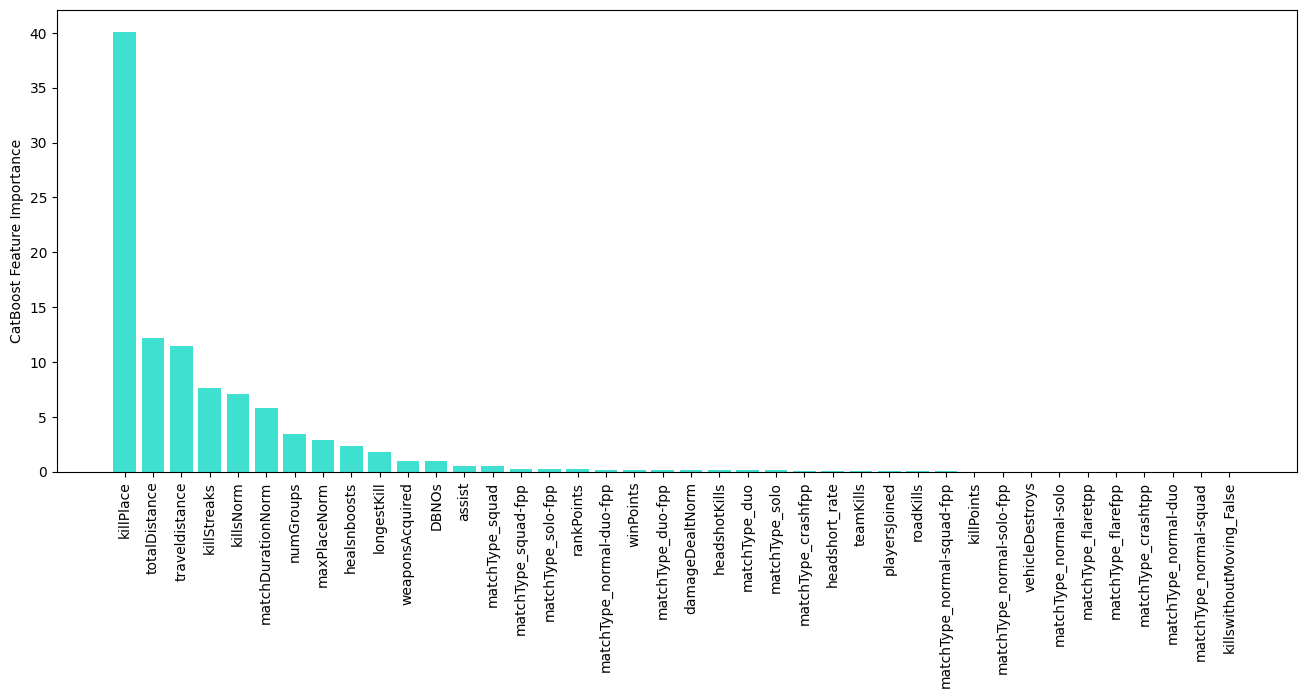

In [47]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

In [48]:
pred = model.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.09
R2: 0.92
